Nutzen Sie die Variable „Relative Height bin98 (cm)“ als label1 für Ihre Klassifizierung und kategorisieren Sie die Vegetationshöhen folgendermaßen: < 3 m, 3 – 6 m, 6 – 10 m und > 10 m.

Savannen-Ökosysteme, wie im Kruger Nationalpark, sind im zeitlichen Verlauf sehr dynamisch und es bestehen leaf-on (Nov - Apr) und leaf-off (Jun - Sep) Perioden während der Regen- und Trockenzeit2. Entgegen Ihrer Intuition, sollen Sie im folgenden die leaf-off Periode untersuchen. 

### offen:
Schauen Sie sich die Verteilung der Datenpunkte in den leaf-off Perioden unterschiedlicher Jahre an. Welches Jahr würde sich hier besonders für die Klassifizierung eignen und wieso? Nutzen Sie die Datenpunkte der leaf-off Periode des ausgewählten Jahres für die Klassifizierung.

In [29]:
import geopandas as gpd
import pandas as pd
filename = r"C:\Uni Jena\GEO 419\Abschlussaufgabe\20230125T1201__L2A__subset_saldi_06.gpkg"
gdf = gpd.read_file(filename)

In [30]:
gdf

,Shot Number,Acquisition Time,Relative Height bin95 (cm),Relative Height bin98 (cm),geometry
0,2.816050e+16,2019-06-12 04:37:15,370.0,457.0,POINT (30.75002 -25.56786)
1,2.816050e+16,2019-06-12 04:37:15,352.0,442.0,POINT (30.75039 -25.56747)
2,2.816050e+16,2019-06-12 04:37:15,442.0,737.0,POINT (30.75077 -25.56709)
3,2.816050e+16,2019-06-12 04:37:15,1457.0,1610.0,POINT (30.75114 -25.56670)
4,2.816050e+16,2019-06-12 04:37:15,1348.0,1494.0,POINT (30.75151 -25.56631)
...,...,...,...,...,...
545274,6.494110e+16,2020-02-04 06:43:13,247.0,314.0,POINT (31.34818 -24.89508)
545275,6.494110e+16,2020-02-04 06:43:13,213.0,269.0,POINT (31.34854 -24.89470)
545276,6.494110e+16,2020-02-04 06:43:13,276.0,422.0,POINT (31.34891 -24.89431)
545277,6.494110e+16,2020-02-04 06:43:13,303.0,404.0,POINT (31.34928 -24.89392)


In [31]:
def classify_gedi(gdf):
    gdf_c = gdf.copy()
    gdf_c.loc[gdf["Relative Height bin98 (cm)"] <= 300, 'Relative Height bin98 (cm)'] = 300
    gdf_c.loc[(gdf["Relative Height bin98 (cm)"] > 300) & (gdf["Relative Height bin98 (cm)"] <= 600), 'Relative Height bin98 (cm)'] = 600
    gdf_c.loc[(gdf["Relative Height bin98 (cm)"] > 600) & (gdf["Relative Height bin98 (cm)"] <= 1000), 'Relative Height bin98 (cm)'] = 1000
    gdf_c.loc[gdf["Relative Height bin98 (cm)"] > 1000, 'Relative Height bin98 (cm)'] = 10000
    gdf = gdf_c.replace({'Relative Height bin98 (cm)' : {300 : '<3 m', 600 : '3 - 6 m', 1000 : '6 - 10 m', 10000 : '> 10 m'}})
    return gdf

In [32]:
gdf_recl = classify_gedi(gdf=gdf)

In [33]:
gdf_recl

,Shot Number,Acquisition Time,Relative Height bin95 (cm),Relative Height bin98 (cm),geometry
0,2.816050e+16,2019-06-12 04:37:15,370.0,3 - 6 m,POINT (30.75002 -25.56786)
1,2.816050e+16,2019-06-12 04:37:15,352.0,3 - 6 m,POINT (30.75039 -25.56747)
2,2.816050e+16,2019-06-12 04:37:15,442.0,6 - 10 m,POINT (30.75077 -25.56709)
3,2.816050e+16,2019-06-12 04:37:15,1457.0,> 10 m,POINT (30.75114 -25.56670)
4,2.816050e+16,2019-06-12 04:37:15,1348.0,> 10 m,POINT (30.75151 -25.56631)
...,...,...,...,...,...
545274,6.494110e+16,2020-02-04 06:43:13,247.0,3 - 6 m,POINT (31.34818 -24.89508)
545275,6.494110e+16,2020-02-04 06:43:13,213.0,<3 m,POINT (31.34854 -24.89470)
545276,6.494110e+16,2020-02-04 06:43:13,276.0,3 - 6 m,POINT (31.34891 -24.89431)
545277,6.494110e+16,2020-02-04 06:43:13,303.0,3 - 6 m,POINT (31.34928 -24.89392)


In [34]:
def leaf_off_subset(gdf):
    gdf['Acquisition Time'] = pd.to_datetime(gdf['Acquisition Time'])
    gdf = gdf.loc[(gdf["Acquisition Time"].dt.month >= 6) & (gdf["Acquisition Time"].dt.month <= 9), :]
    return gdf

In [35]:
gdf_recl_lo = leaf_off_subset(gdf=gdf_recl)
gdf_lo = leaf_off_subset(gdf=gdf)

In [37]:
gdf_recl_lo

,Shot Number,Acquisition Time,Relative Height bin95 (cm),Relative Height bin98 (cm),geometry
0,2.816050e+16,2019-06-12 04:37:15,370.0,3 - 6 m,POINT (30.75002 -25.56786)
1,2.816050e+16,2019-06-12 04:37:15,352.0,3 - 6 m,POINT (30.75039 -25.56747)
2,2.816050e+16,2019-06-12 04:37:15,442.0,6 - 10 m,POINT (30.75077 -25.56709)
3,2.816050e+16,2019-06-12 04:37:15,1457.0,> 10 m,POINT (30.75114 -25.56670)
4,2.816050e+16,2019-06-12 04:37:15,1348.0,> 10 m,POINT (30.75151 -25.56631)
...,...,...,...,...,...
485233,1.436308e+17,2021-06-25 21:48:14,299.0,3 - 6 m,POINT (32.04871 -25.94630)
485234,1.436308e+17,2021-06-25 21:48:14,520.0,6 - 10 m,POINT (32.04908 -25.94590)
485235,1.436308e+17,2021-06-25 21:48:14,280.0,3 - 6 m,POINT (32.04945 -25.94551)
485236,1.436308e+17,2021-06-25 21:48:14,217.0,<3 m,POINT (32.04982 -25.94512)


In [38]:
gdf_lo

,Shot Number,Acquisition Time,Relative Height bin95 (cm),Relative Height bin98 (cm),geometry
0,2.816050e+16,2019-06-12 04:37:15,370.0,457.0,POINT (30.75002 -25.56786)
1,2.816050e+16,2019-06-12 04:37:15,352.0,442.0,POINT (30.75039 -25.56747)
2,2.816050e+16,2019-06-12 04:37:15,442.0,737.0,POINT (30.75077 -25.56709)
3,2.816050e+16,2019-06-12 04:37:15,1457.0,1610.0,POINT (30.75114 -25.56670)
4,2.816050e+16,2019-06-12 04:37:15,1348.0,1494.0,POINT (30.75151 -25.56631)
...,...,...,...,...,...
485233,1.436308e+17,2021-06-25 21:48:14,299.0,367.0,POINT (32.04871 -25.94630)
485234,1.436308e+17,2021-06-25 21:48:14,520.0,621.0,POINT (32.04908 -25.94590)
485235,1.436308e+17,2021-06-25 21:48:14,280.0,352.0,POINT (32.04945 -25.94551)
485236,1.436308e+17,2021-06-25 21:48:14,217.0,269.0,POINT (32.04982 -25.94512)


#### Verteilung der Datenpunkte pro Jahr

0         POINT (30.75002 -25.56786)
1         POINT (30.75039 -25.56747)
2         POINT (30.75077 -25.56709)
3         POINT (30.75114 -25.56670)
4         POINT (30.75151 -25.56631)
                     ...            
485233    POINT (32.04871 -25.94630)
485234    POINT (32.04908 -25.94590)
485235    POINT (32.04945 -25.94551)
485236    POINT (32.04982 -25.94512)
485237    POINT (32.04998 -25.95390)
Name: geometry, Length: 242832, dtype: geometry

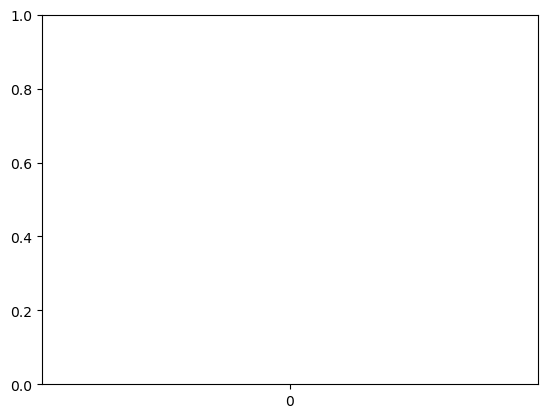

In [40]:
import seaborn as sns
# meine Idee wären hier je ein Boxplot pro Jahr anhand der nicht klassifizierten Werte für leaf-off (gdf_lo)

sns.boxplot()
# räumliche Verteilung auch relevant, hier könnten ebenfalls Boxplots/Violinplots erstelt werden
# vielleicht auch Karten?

gdf_lo.geometry